In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import os
import networkx as nx
from subprocess import check_output
%matplotlib inline

#now first i will check every csv file one by one to see what lie inside them 

In [2]:
inventories = pd.read_csv('/Users/arslanaliawan/Desktop/task_dataset/inventories.csv')
inventories.head()


,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [3]:
inventories_parts = pd.read_csv('/Users/arslanaliawan/Desktop/task_dataset/inventory_parts.csv')
inventories_parts.head()

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


In [4]:
inventories_sets = pd.read_csv('/Users/arslanaliawan/Desktop/task_dataset/inventory_sets.csv')
inventories_sets.head()

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [5]:
parts = pd.read_csv('/Users/arslanaliawan/Desktop/task_dataset/parts.csv')
parts.head()

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


In [6]:
sets = pd.read_csv('/Users/arslanaliawan/Desktop/task_dataset/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,001-1,Gears,1965,1,43
2,0011-2,Town Mini-Figures,1978,84,12
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
4,0012-1,Space Mini-Figures,1979,143,12


In [7]:
colors = pd.read_csv('/Users/arslanaliawan/Desktop/task_dataset/colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [8]:
themes = pd.read_csv('/Users/arslanaliawan/Desktop/task_dataset/themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [9]:
part_categories = pd.read_csv('/Users/arslanaliawan/Desktop/task_dataset/part_categories.csv')
part_categories.head()

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special


In [10]:
part_relationships = pd.read_csv('/Users/arslanaliawan/Desktop/task_dataset/part_relationships.csv')
part_relationships.head()

,rel_type,child_part_num,parent_part_num
0,A,50990b,50990a
1,P,3298pb010,3298
2,P,19729pr0013a,19729
3,P,3070bpb043,3070b
4,P,6180pb017l,6180


In [11]:
#as i have seen the columns in a all dataset. now i will start the real work for making charts as required
# for this i will use sets.csv file first
sets = pd.read_csv('/Users/arslanaliawan/Desktop/task_dataset/sets.csv')
sets.head()


,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,001-1,Gears,1965,1,43
2,0011-2,Town Mini-Figures,1978,84,12
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
4,0012-1,Space Mini-Figures,1979,143,12


# Chart :1 shows which themes have the most sets

In [12]:
sets = pd.read_csv('/Users/arslanaliawan/Desktop/task_dataset/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,001-1,Gears,1965,1,43
2,0011-2,Town Mini-Figures,1978,84,12
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
4,0012-1,Space Mini-Figures,1979,143,12


In [13]:
themes = pd.read_csv('/Users/arslanaliawan/Desktop/task_dataset/themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [14]:
# So we can see that in the sets dataframe we can access the theme id as we can see on the schema :

#Also we can see that themes with parent_id are not really usefull here because parents theme count are the sum of each child count.

#So let's start by counting the frequency of each theme 

In [15]:
set_theme_count = sets["theme_id"].value_counts()
#Convert it to dataframe
set_theme_count = pd.DataFrame({'id':set_theme_count.index, 'count':set_theme_count.values})

print(set_theme_count.head())

    id  count
0  501    361
1  505    297
2  494    285
3  371    273
4  435    270


In [16]:
# Now that we have our dataframe with the count we have to join it with the theme dataframe

In [17]:
set_theme_count = pd.merge(set_theme_count, themes, on='id')

print(set_theme_count.head())

    id  count          name  parent_id
0  501    361          Gear        NaN
1  505    297     Basic Set      504.0
2  494    285       Friends        NaN
3  371    273  Supplemental      365.0
4  435    270       Ninjago        NaN


In [18]:
# Get only themes with no parent

set_theme_count_no_parent = set_theme_count[pd.isnull(set_theme_count['parent_id'])]
print(set_theme_count_no_parent.head())

    id  count           name  parent_id
0  501    361           Gear        NaN
2  494    285        Friends        NaN
4  435    270        Ninjago        NaN
5  497    238          Books        NaN
9  443    192  Service Packs        NaN


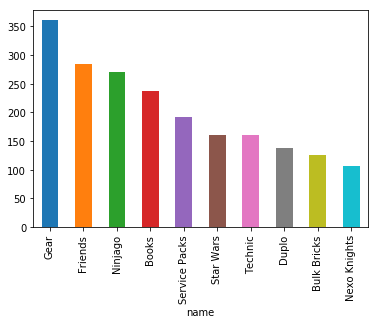

In [19]:
#Great ! Now we have to get our top 10 and plot it !

# Get the top 10 and plot it
set_theme_count_top_10 = set_theme_count_no_parent.sort_values(by=["count"], ascending=False)[:10]
top_10 = set_theme_count_top_10["count"]
top_10.index = set_theme_count_top_10["name"]

top_10.plot.bar()
plt.show()



In [20]:
#From the above analysis we have found out that Gear themes have the most sets
#p.S i am not a lego fan. Hope some lego fan will check this analysis and let me know :) 

# chart :2 shows Lego sets by Year using sets,year dimension 

In [21]:
print(check_output(["ls", "/Users/arslanaliawan/Desktop/task_dataset"]).decode("utf8"))

Other Depreciation Methods.docx
colors.csv
inventories.csv
inventory_parts.csv
inventory_sets.csv
part_categories.csv
part_relationships.csv
parts.csv
sets.csv
themes.csv



In [22]:
data_files = [
    'colors.csv',
    'inventories.csv',
    'inventory_parts.csv',
    'inventory_sets.csv',
    'part_categories.csv',
    'parts.csv',
    'sets.csv',
    'themes.csv'
]

data = {}

In [23]:
for file in data_files:
    file_path = f'/Users/arslanaliawan/Desktop/task_dataset/{file}'
    file_nm, file_ext = os.path.splitext(file)
    if file_nm not in data:
        data[file_nm] = pd.read_csv(file_path)

In [24]:
for key in data:
    print(key)

colors
inventories
inventory_parts
inventory_sets
part_categories
parts
sets
themes


In [25]:
data['sets'].head()



,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,001-1,Gears,1965,1,43
2,0011-2,Town Mini-Figures,1978,84,12
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
4,0012-1,Space Mini-Figures,1979,143,12


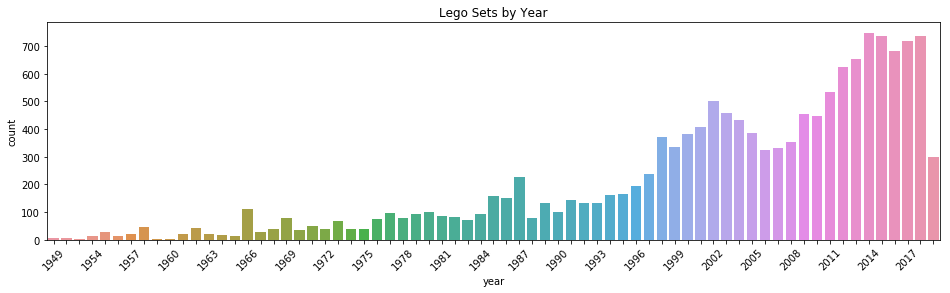

In [26]:
fig, ax = plt.subplots(figsize=(16,4))
sns.countplot(data['sets']['year']).set_title('Lego Sets by Year')

for label in ax.xaxis.get_ticklabels():
    label.set_visible(False)
for label in ax.xaxis.get_ticklabels()[::3]:
    label.set_visible(True)

plt.xticks(rotation=45)
plt.show()

# chart : 3 shows shows hierarchy using themes table

In [27]:
themes = pd.read_csv('/Users/arslanaliawan/Desktop/task_dataset/themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [28]:
# themes.iloc[0,2] = 1

In [29]:
# themes.iloc[0,2]

In [30]:
# themes[themes["parent_id"] == 1]["name"]

In [31]:
s = set(themes["parent_id"])
len(s)
# len(themes)

200

In [32]:
dictionary = dict()
for i in range(1,len(s)):
    dictionary.update(dict(zip(themes[themes["id"] == i]["name"], [themes[themes["parent_id"] == i]["name"]])))

In [33]:
# dictionary['Technic']

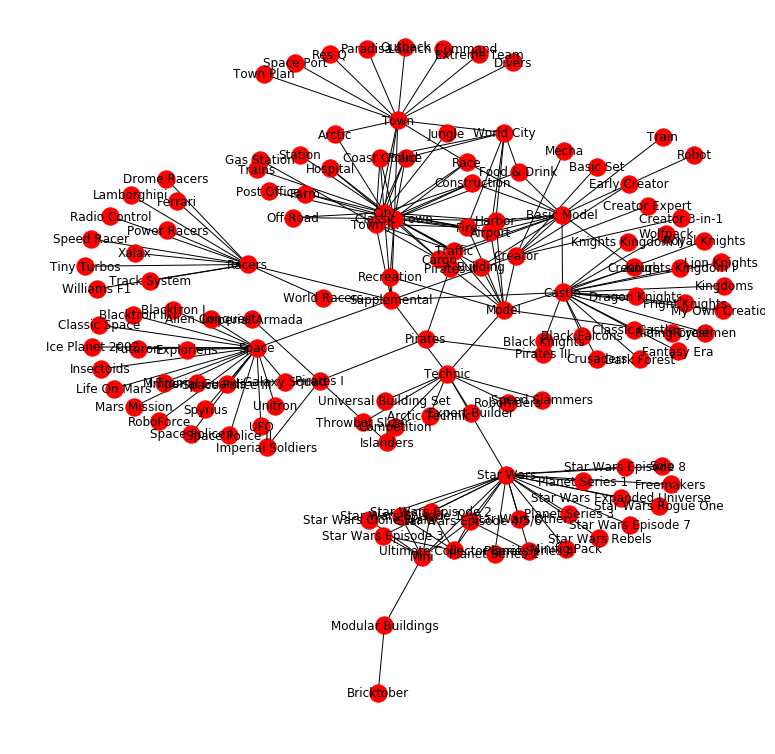

In [51]:
G = nx.Graph(dictionary)
nx.draw_kamada_kawai(G, with_labels=True)
plt.show()

# Story or descriptive analysis 

In [36]:
#first i merge the table inventoris and inventories_sets using set_num 
combined_tables0 = pd.merge(inventories, inventories_sets, on ='set_num')
combined_tables0.head()

,id,version,set_num,inventory_id,quantity
0,17,1,850950-1,1334,1
1,19,1,4444-1,2514,1
2,25,1,71012-11,16460,1
3,32,1,4024-21,8140,1
4,34,1,71017-20,16594,2


In [37]:
# the i am merging the table of previous combined result and sets using set_num 
combined_tables1 = pd.merge(combined_tables0, sets , on ='set_num')
combined_tables1.head()

,id,version,set_num,inventory_id,quantity,name,year,theme_id,num_parts
0,17,1,850950-1,1334,1,Christmas Cat Ornament,2014,228,34
1,19,1,4444-1,2514,1,Coca-Cola Defender 2,2002,462,4
2,25,1,71012-11,16460,1,Minnie Mouse,2016,555,6
3,32,1,4024-21,8140,1,Advent Calendar 2003 Creator (Day 20) Santa,2003,223,13
4,34,1,71017-20,16594,2,The Mime,2017,609,7


In [38]:
#then i am merging the table of latest combined result and parts using name 
combined_tables2 = pd.merge(combined_tables1, parts , on = 'name')
combined_tables2.head()

,id,version,set_num,inventory_id,quantity,name,year,theme_id,num_parts,part_num,part_cat_id
0,554,1,7606-1,9443,1,Frog,2006,22,33,33320,28
1,8109,1,4076-1,10089,1,Pteranodon,2001,273,17,30478,28
2,15851,1,6720-1,12907,1,Tyrannosaurus Rex,2001,386,23,30457c01,28


In [39]:
combined_tables2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 11 columns):
id              3 non-null int64
version         3 non-null int64
set_num         3 non-null object
inventory_id    3 non-null int64
quantity        3 non-null int64
name            3 non-null object
year            3 non-null int64
theme_id        3 non-null int64
num_parts       3 non-null int64
part_num        3 non-null object
part_cat_id     3 non-null int64
dtypes: int64(8), object(3)
memory usage: 288.0+ bytes


In [40]:
#i have combined 4 tables on the basis of common feature 
#You can review the shape and size of your dataset by printing the shape property on the Pandas DataFrame.
combined_tables2.shape

(3, 11)

In [41]:
#You can list the data types used by the DataFrame to characterize each attribute using the dtypes property.
combined_tables2.dtypes

id               int64
version          int64
set_num         object
inventory_id     int64
quantity         int64
name            object
year             int64
theme_id         int64
num_parts        int64
part_num        object
part_cat_id      int64
dtype: object

In [42]:
#Descriptive statistics can give you great insight into the shape of each attribute.
#Often you can create more summaries than you have time to review. 
combined_tables2.describe()

,id,version,inventory_id,quantity,year,theme_id,num_parts,part_cat_id
count,3.000000,3.0,3.000000,3.0,3.000000,3.000000,3.000000,3.0
mean,8171.333333,1.0,10813.000000,1.0,2002.666667,227.000000,24.333333,28.0
std,7648.690498,0.0,1841.997828,0.0,2.886751,186.308883,8.082904,0.0
min,554.000000,1.0,9443.000000,1.0,2001.000000,22.000000,17.000000,28.0
25%,4331.500000,1.0,9766.000000,1.0,2001.000000,147.500000,20.000000,28.0
50%,8109.000000,1.0,10089.000000,1.0,2001.000000,273.000000,23.000000,28.0
75%,11980.000000,1.0,11498.000000,1.0,2003.500000,329.500000,28.000000,28.0
max,15851.000000,1.0,12907.000000,1.0,2006.000000,386.000000,33.000000,28.0


In [43]:
#On classification problems you need to know how balanced the class values are.
combined_tables2.groupby('theme_id').size()

theme_id
22     1
273    1
386    1
dtype: int64

In [44]:
#Correlation refers to the relationship between two variables and how they may or may not change together.
combined_tables2.corr(method='pearson')

,id,version,inventory_id,quantity,year,theme_id,num_parts,part_cat_id
id,1.000000,NaN,0.942662,NaN,-0.862475,0.975339,-0.613029,NaN
version,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inventory_id,0.942662,NaN,1.000000,NaN,-0.644113,0.845753,-0.314198,NaN
quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,-0.862475,NaN,-0.644113,NaN,1.000000,-0.952908,0.928571,NaN
theme_id,0.975339,NaN,0.845753,NaN,-0.952908,1.000000,-0.772287,NaN
num_parts,-0.613029,NaN,-0.314198,NaN,0.928571,-0.772287,1.000000,NaN
part_cat_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


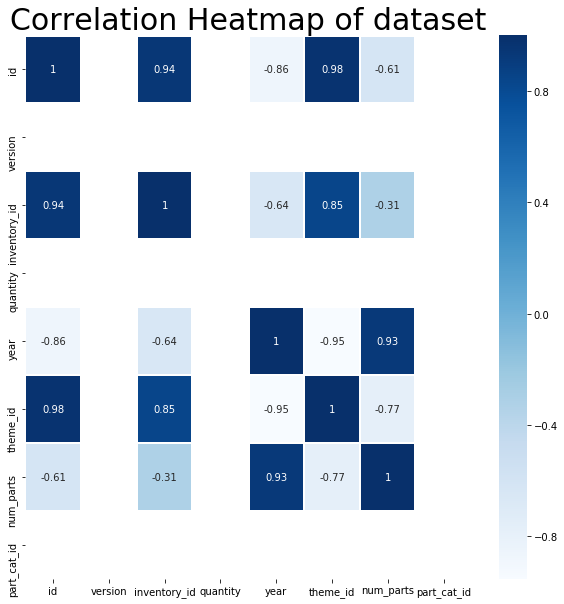

In [45]:
# Correlation heatmap
plt.rcParams['figure.figsize']=(10,10)
hm= sns.heatmap(combined_tables2[['id', 'version', 'inventory_id', 'quantity', 'year',
       'theme_id', 'num_parts', 'part_cat_id']].corr(), annot = True, linewidths=1.5, cmap='Blues')
hm.set_title(label='Correlation Heatmap of dataset', fontsize=30)
hm;

In [46]:
#Variance is easy to calculate. In the example below we use the var method to carry out the calculation
combined_tables2.var()

id              5.850247e+07
version         0.000000e+00
inventory_id    3.392956e+06
quantity        0.000000e+00
year            8.333333e+00
theme_id        3.471100e+04
num_parts       6.533333e+01
part_cat_id     0.000000e+00
dtype: float64

# Question 2 : Calculate and visualize asset lifetime value given straight line depreciation method for latest Macbook. Assume cost of 1499 euro and 3 years asset lifetime. Describe other depreciation methods and their advantages/disadvantages for this specific asset type.

In [47]:
print("Straight Line Depreciation\n")
BV=1499
Life=3
slvg=400
ind = range(0,Life)
print ('%17s'%"Year"'%17s'%"Dep"'%17s'% "BV")
index=list('ABC')
df = pd.DataFrame(columns=index)
for i in range(0,Life):
    Dep=((BV-slvg)*i)/Life
    AccDep=((BV-slvg)*(Life-i))/Life
    l = (i,Dep,AccDep)
    df = df.append(pd.Series(l,index=index),ignore_index=True)
    print ('%12.0f'%i,'%12.2f'%Dep, '%12.2f'%AccDep)

Straight Line Depreciation

         Year          Dep               BV
           0         0.00      1099.00
           1       366.33       732.67
           2       732.67       366.33


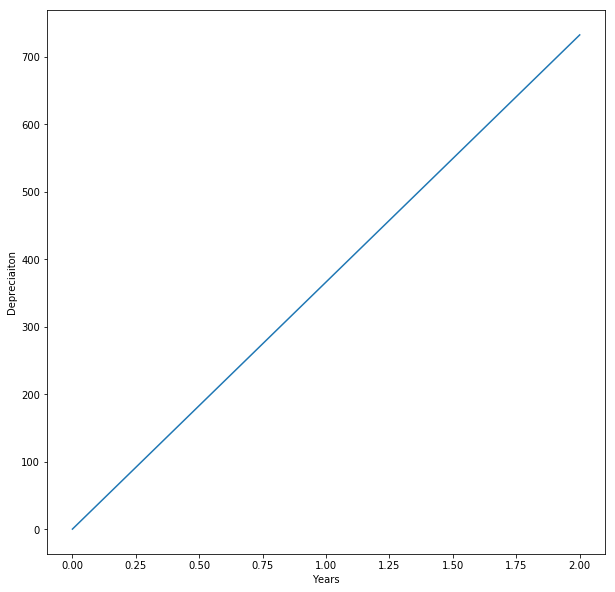

In [48]:
df.head()
plt.plot(df['A'],df['B'])
plt.xlabel('Years')
plt.ylabel('Depreciaiton')
plt.show()

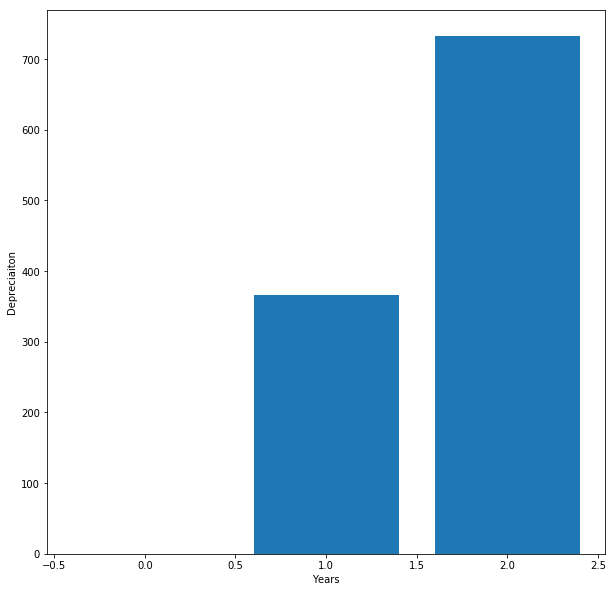

In [49]:
#we can also analyse the data by using bar
plt.bar(df['A'],df['B'])
plt.xlabel('Years')
plt.ylabel('Depreciaiton')
plt.show()

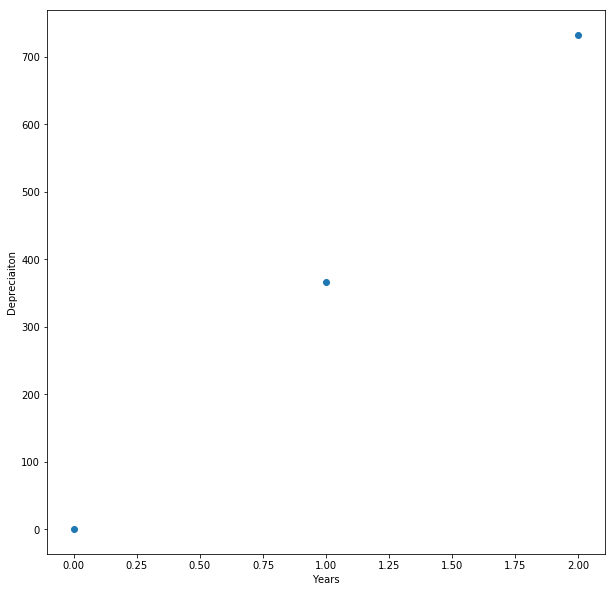

In [50]:
#we can also analyse the data by using scatter plot
plt.scatter(df['A'],df['B'])
plt.xlabel('Years')
plt.ylabel('Depreciaiton')
plt.show()